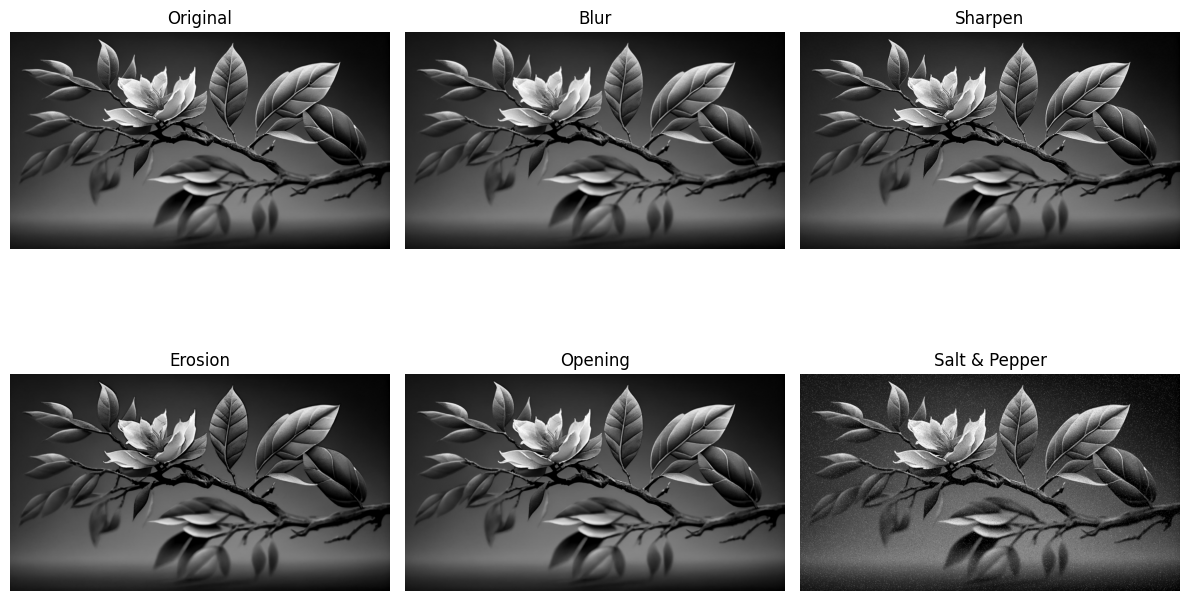

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para agregar ruido sal y pimienta
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy = np.copy(image)
    total_pixels = image.size

    # Sal (blanco)
    num_salt = np.ceil(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = 255

    # Pimienta (negro)
    num_pepper = np.ceil(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = 0

    return noisy

# Cargar imagen en escala de grises
image = cv2.imread('/content/leafy-tree-branch-vibrant-autumn-colors-generated-by-ai.jpg', cv2.IMREAD_GRAYSCALE)

# Filtro de desenfoque (Blur)
blur = cv2.GaussianBlur(image, (5, 5), 0)

# Filtro de enfoque (Sharpening)
kernel_sharpen = np.array([[0, -1,  0],
                           [-1, 5, -1],
                           [0, -1,  0]])
sharpened = cv2.filter2D(image, -1, kernel_sharpen)

# Erosión
kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(image, kernel, iterations=1)

# Apertura (Opening = erosión seguida de dilatación)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Agregar ruido sal y pimienta
noisy = add_salt_pepper_noise(image, 0.02, 0.02)

# Mostrar resultados
titles = ['Original', 'Blur', 'Sharpen', 'Erosion', 'Opening', 'Salt & Pepper']
images = [image, blur, sharpened, eroded, opening, noisy]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Función para agregar ruido sal y pimienta
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy = np.copy(image)
    total_pixels = image.size

    # Sal (blanco)
    num_salt = np.ceil(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = 255

    # Pimienta (negro)
    num_pepper = np.ceil(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = 0

    return noisy

# Ruta de la imagen original
ruta_imagen = '/content/Flores.jpg'  # <-- Cambia esto a tu ruta
imagen_original = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Crear carpeta para guardar resultados
os.makedirs("resultados_filtros2", exist_ok=True)

# Filtro de desenfoque (Blur)
blur = cv2.GaussianBlur(imagen_original, (5, 5), 0)
cv2.imwrite('resultados_filtros2/blur.png', blur)

# Filtro de enfoque (Sharpening)
kernel_sharpen = np.array([[0, -1,  0],
                           [-1, 5, -1],
                           [0, -1,  0]])
sharpened = cv2.filter2D(imagen_original, -1, kernel_sharpen)
cv2.imwrite('resultados_filtros2/sharpen.png', sharpened)

# Erosión
kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(imagen_original, kernel, iterations=1)
cv2.imwrite('resultados_filtros2/eroded.png', eroded)

# Apertura (Opening)
opening = cv2.morphologyEx(imagen_original, cv2.MORPH_OPEN, kernel)
cv2.imwrite('resultados_filtros2/opening.png', opening)

# Ruido Sal y Pimienta
noisy = add_salt_pepper_noise(imagen_original, 0.02, 0.02)
cv2.imwrite('resultados_filtros2/salt_pepper.png', noisy)

# Guardar imagen original también
cv2.imwrite('resultados_filtros2/original.png', imagen_original)

print("✅ Imágenes guardadas en la carpeta 'resultados_filtros2'")


✅ Imágenes guardadas en la carpeta 'resultados_filtros2'


In [7]:
import cv2
import numpy as np

# Cargar la imagen
imagen = cv2.imread('/content/Removal_Background.jpg')
if imagen is None:
    raise FileNotFoundError("No se pudo cargar la imagen. Verifica la ruta.")

# Convertir a HSV
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Crear dos rangos para detectar el color rojo
# Rojo oscuro
rojo_bajo1 = np.array([0, 100, 100])
rojo_alto1 = np.array([10, 255, 255])

# Rojo claro
rojo_bajo2 = np.array([160, 100, 100])
rojo_alto2 = np.array([180, 255, 255])

# Crear dos máscaras y combinarlas
mascara1 = cv2.inRange(imagen_hsv, rojo_bajo1, rojo_alto1)
mascara2 = cv2.inRange(imagen_hsv, rojo_bajo2, rojo_alto2)
mascara_rojo = cv2.bitwise_or(mascara1, mascara2)

# Invertimos la máscara para quedarnos con el objeto
mascara_invertida = cv2.bitwise_not(mascara_rojo)

# Aplicar máscara a la imagen original
resultado = cv2.bitwise_and(imagen, imagen, mask=mascara_invertida)

# Mostrar resultados
cv2.imshow('Original', imagen)
cv2.imshow('Sin fondo rojo', resultado)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Guardar el resultado si lo deseas
cv2.imwrite('resultado_sin_fondo.jpg', resultado)


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow
